## Assignment S8 :

* Change the dataset to CIFAR10
* Make this network:
C1 C2 c3 P1 C4 C4 C6 c7 P2 C8 C9 C10 GAP c11
* Keep the parameter count less than 50000
* Try and add one layer to another
* Max Epochs is 20
* You are making 3 versions of the above code (in each case achieve above 70% accuracy):
  * Network with Group Normalization
  * Network with Layer Normalization
  * Network with Batch Normalization
* Print 10 Misclassified image.




In [1]:
%load_ext autoreload

In [2]:

!pip install torchsummary

Importing libraries

In [3]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from utils import test, train, plot_curves,get_incorrect_predictions
from visualize import print_samples,print_class_scale,plot_confusion_matrix,plot_incorrect_predictions
from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR

import warnings
warnings.filterwarnings('ignore')

Defining data tranformations

In [4]:
train_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation((-10., 10.), fill=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


Downloading MNIST dataset and splitting to train and test set

In [5]:
train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 43465528.76it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [6]:
SEED = 1
BATCHSIZE = 128
BATCHSIZE_2 = 64
NUM_OF_WORKER = 4
EPOCHS = 15

Creating Data Loaders from train data and test data

In [7]:
# Checking for CUDA
cuda = torch.cuda.is_available()
print("CUDA Available",cuda)

torch.manual_seed(SEED)
if cuda:
  torch.cuda.manual_seed(SEED)

kwargs = {'shuffle' : True,'batch_size' : BATCHSIZE,'num_workers': 4, 'pin_memory': True} if cuda else {'shuffle' : True,'batch_size' : BATCHSIZE_2}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs) # creating train data loader
test_loader = torch.utils.data.DataLoader(test_data, **kwargs) # creating test dataloader

CUDA Available True


In [8]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']


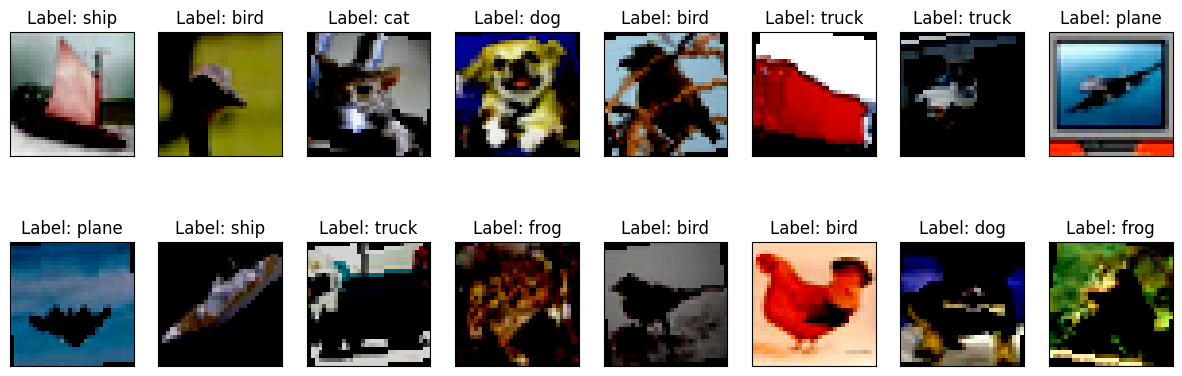

In [9]:
print_samples(train_loader,classes)

Transferring model to GPU and printing model summary

In [10]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = Net(norm="BN").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
       BatchNorm2d-2           [-1, 10, 32, 32]              20
         Dropout2d-3           [-1, 10, 32, 32]               0
            Conv2d-4           [-1, 10, 32, 32]             900
       BatchNorm2d-5           [-1, 10, 32, 32]              20
         Dropout2d-6           [-1, 10, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]             160
         MaxPool2d-8           [-1, 16, 16, 16]               0
            Conv2d-9           [-1, 24, 16, 16]           3,456
      BatchNorm2d-10           [-1, 24, 16, 16]              48
        Dropout2d-11           [-1, 24, 16, 16]               0
           Conv2d-12           [-1, 16, 16, 16]           3,456
      BatchNorm2d-13           [-1, 16, 16, 16]              32
        Dropout2d-14           [-1, 16,

In [11]:
model =  Net(norm='BN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=1.5652 Batch_id=390 Accuracy=40.64: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test set: Average loss: 1.3508, Accuracy: 5077/10000 (50.77%)

EPOCH: 1


Train: Loss=1.1676 Batch_id=390 Accuracy=53.51: 100%|██████████| 391/391 [00:44<00:00,  8.77it/s]


Test set: Average loss: 1.1490, Accuracy: 5858/10000 (58.58%)

EPOCH: 2


Train: Loss=1.1464 Batch_id=390 Accuracy=58.78: 100%|██████████| 391/391 [00:45<00:00,  8.69it/s]


Test set: Average loss: 1.0554, Accuracy: 6202/10000 (62.02%)

EPOCH: 3


Train: Loss=1.0101 Batch_id=390 Accuracy=62.16: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]


Test set: Average loss: 0.9705, Accuracy: 6492/10000 (64.92%)

EPOCH: 4


Train: Loss=1.0161 Batch_id=390 Accuracy=64.31: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Test set: Average loss: 0.9316, Accuracy: 6746/10000 (67.46%)

EPOCH: 5


Train: Loss=1.1788 Batch_id=390 Accuracy=66.06: 100%|██████████| 391/391 [00:44<00:00,  8.86it/s]


Test set: Average loss: 0.8778, Accuracy: 6875/10000 (68.75%)

EPOCH: 6


Train: Loss=1.0361 Batch_id=390 Accuracy=67.66: 100%|██████████| 391/391 [00:43<00:00,  8.91it/s]


Test set: Average loss: 0.8281, Accuracy: 7060/10000 (70.60%)

EPOCH: 7


Train: Loss=0.8157 Batch_id=390 Accuracy=68.69: 100%|██████████| 391/391 [00:44<00:00,  8.71it/s]


Test set: Average loss: 0.7941, Accuracy: 7217/10000 (72.17%)

EPOCH: 8


Train: Loss=0.9984 Batch_id=390 Accuracy=69.53: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]


Test set: Average loss: 0.7676, Accuracy: 7279/10000 (72.79%)

EPOCH: 9


Train: Loss=0.6069 Batch_id=390 Accuracy=70.45: 100%|██████████| 391/391 [00:45<00:00,  8.50it/s]


Test set: Average loss: 0.7694, Accuracy: 7287/10000 (72.87%)

EPOCH: 10


Train: Loss=0.8722 Batch_id=390 Accuracy=71.29: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test set: Average loss: 0.7486, Accuracy: 7355/10000 (73.55%)

EPOCH: 11


Train: Loss=0.8310 Batch_id=390 Accuracy=72.04: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]


Test set: Average loss: 0.7167, Accuracy: 7454/10000 (74.54%)

EPOCH: 12


Train: Loss=0.7693 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [00:45<00:00,  8.50it/s]


Test set: Average loss: 0.7068, Accuracy: 7509/10000 (75.09%)

EPOCH: 13


Train: Loss=0.9223 Batch_id=390 Accuracy=73.39: 100%|██████████| 391/391 [00:46<00:00,  8.38it/s]


Test set: Average loss: 0.6912, Accuracy: 7609/10000 (76.09%)

EPOCH: 14


Train: Loss=0.7764 Batch_id=390 Accuracy=73.76: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s]


Test set: Average loss: 0.6755, Accuracy: 7654/10000 (76.54%)

EPOCH: 15


Train: Loss=0.7592 Batch_id=390 Accuracy=74.18: 100%|██████████| 391/391 [00:44<00:00,  8.79it/s]


Test set: Average loss: 0.6785, Accuracy: 7614/10000 (76.14%)

EPOCH: 16


Train: Loss=0.7013 Batch_id=390 Accuracy=74.66: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]


Test set: Average loss: 0.6664, Accuracy: 7663/10000 (76.63%)

EPOCH: 17


Train: Loss=0.5647 Batch_id=390 Accuracy=75.01: 100%|██████████| 391/391 [00:48<00:00,  7.99it/s]


Test set: Average loss: 0.6425, Accuracy: 7780/10000 (77.80%)

EPOCH: 18


Train: Loss=0.4996 Batch_id=390 Accuracy=75.25: 100%|██████████| 391/391 [00:47<00:00,  8.26it/s]


Test set: Average loss: 0.6462, Accuracy: 7769/10000 (77.69%)

EPOCH: 19


Train: Loss=0.5932 Batch_id=390 Accuracy=75.70: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Test set: Average loss: 0.6365, Accuracy: 7817/10000 (78.17%)



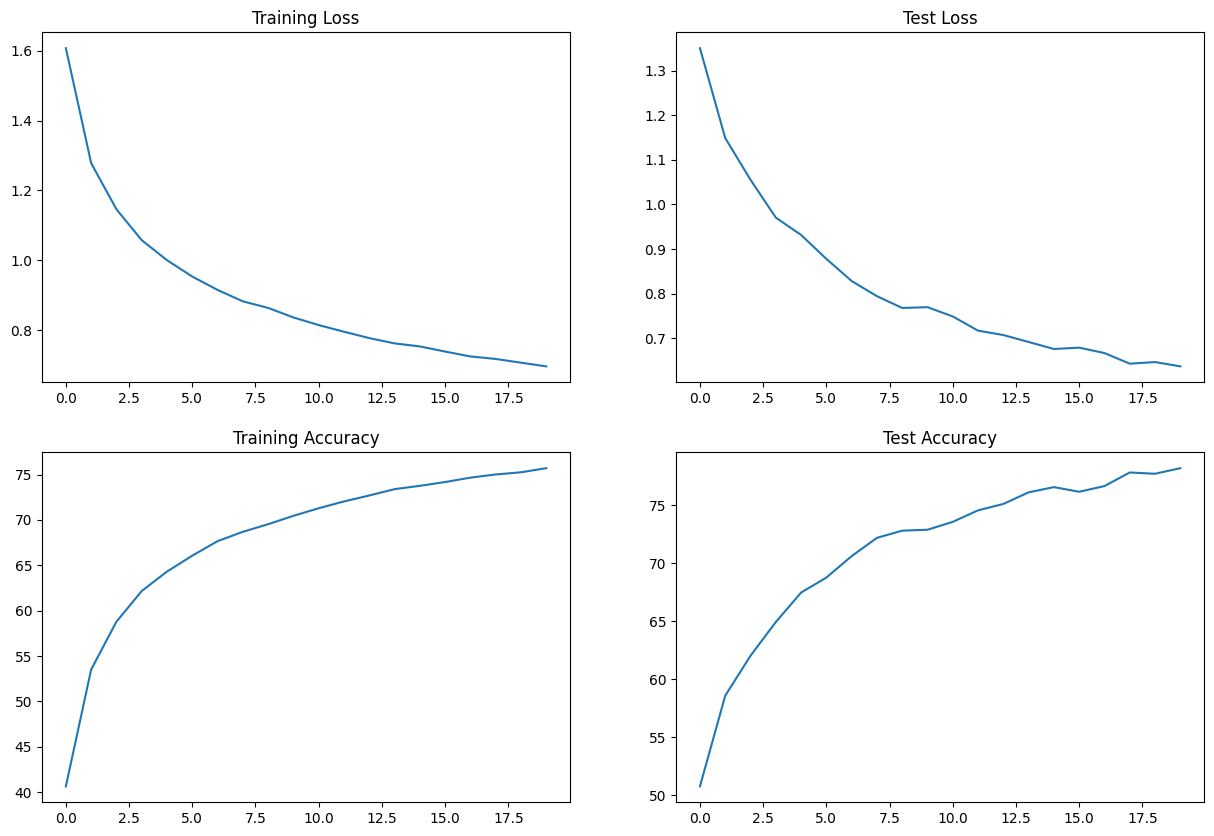

In [12]:
plot_curves()

In [13]:
wrong_prediction_list = get_incorrect_predictions(model,test_loader,device)

Total Incorrect Predictions 2183


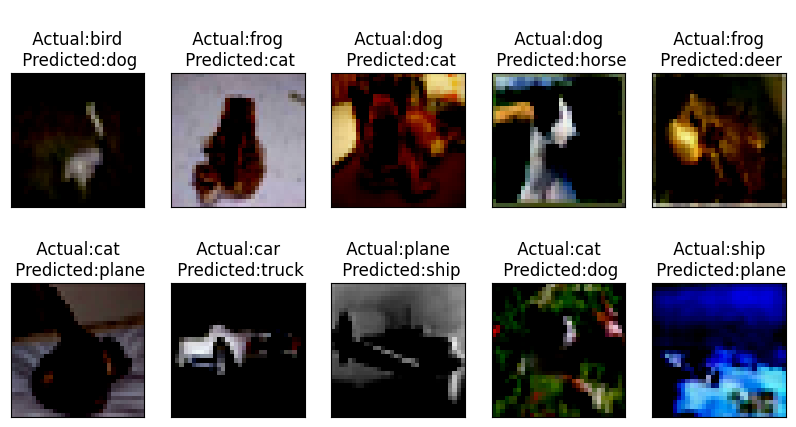

In [14]:
plot_incorrect_predictions(wrong_prediction_list,classes)

## Confusion Matrix

Confusion matrix, without normalization


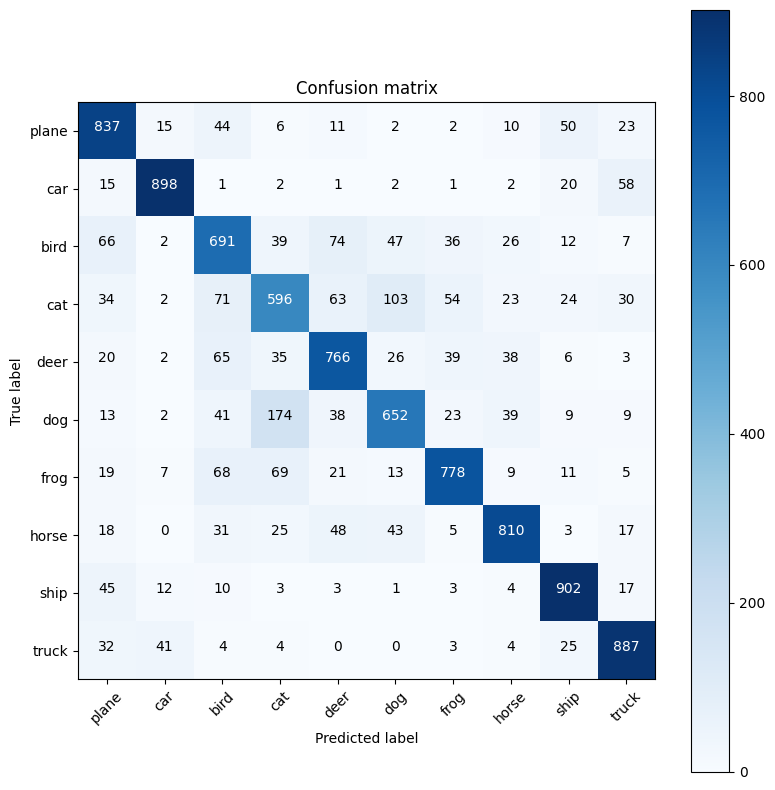

In [15]:
from utils import get_all_predictions, get_incorrect_predictions, prepare_confusion_matrix

all_preds, all_targets = get_all_predictions(model, test_loader, device)
confusion_matrix = prepare_confusion_matrix(all_preds, all_targets, classes)
plot_confusion_matrix(confusion_matrix, classes, False)

## Save Model

In [16]:
torch.save(model.state_dict(), 'model_bn.pth')

In [17]:
# Load Model
#model = Net(norm="BN").to(device)
#model.load_state_dict(torch.load('model_bn.pth'))